## Import Libraries

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Loading Data

In [3]:
df = pd.read_csv('telco_data_clean.csv', index_col=False)
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,...,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn,monthly_charges_cat,tenure_year
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Low Expense,1
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,56.95,1889.50,No,Medium Expense,3
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Medium Expense,1
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Medium Expense,4
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Medium High Expense,1


In [4]:
df.columns

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'churn',
       'monthly_charges_cat', 'tenure_year'],
      dtype='object')

# 4.EDA

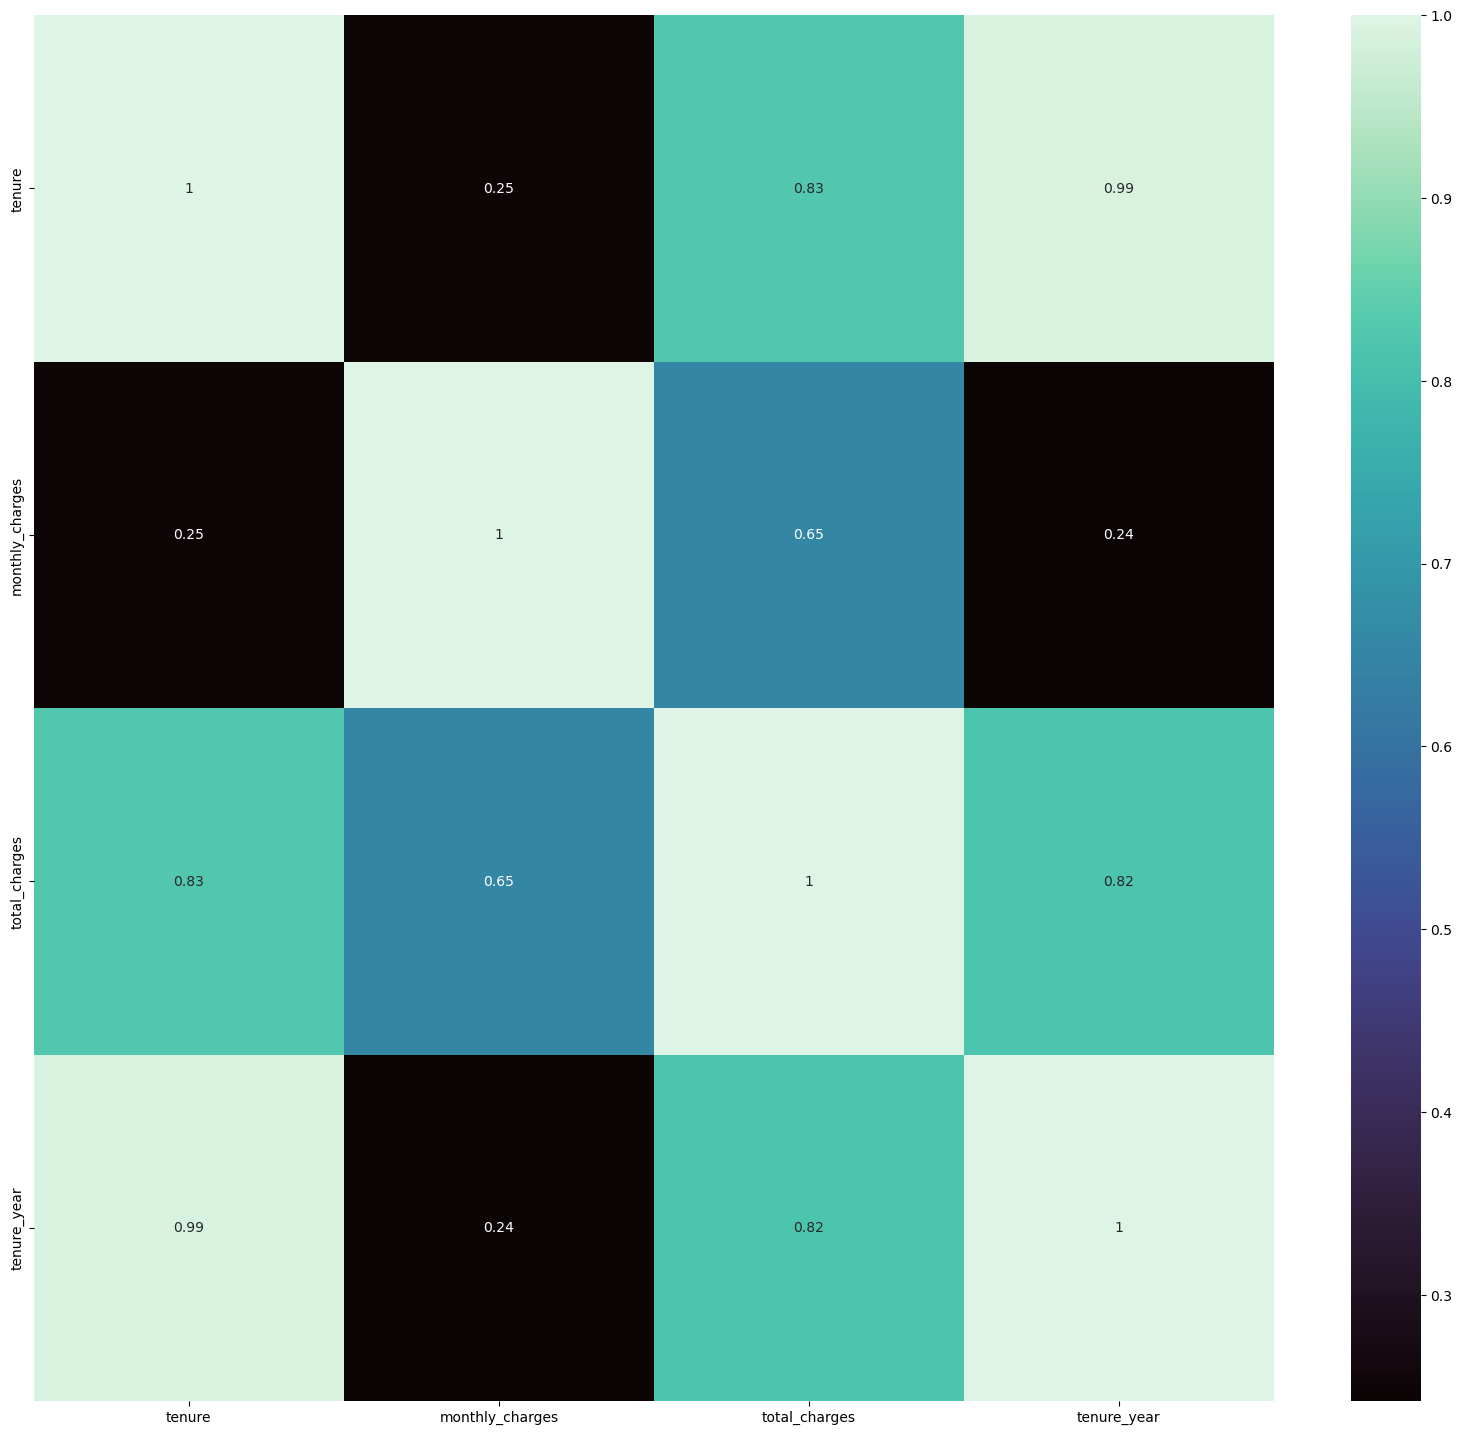

In [5]:
corr = df.corr()

plt.figure(figsize=(20,18))
sns.heatmap(corr, annot=True, cmap="mako")
plt.show()

## 4.1 EDA kolom target (Churn)

In [6]:
target = df["churn"].value_counts().reset_index()
persen = df["churn"].value_counts(normalize=True).reset_index()
target["percentage"] = persen["churn"]
target

,index,churn,percentage
0,No,5163,0.734215
1,Yes,1869,0.265785


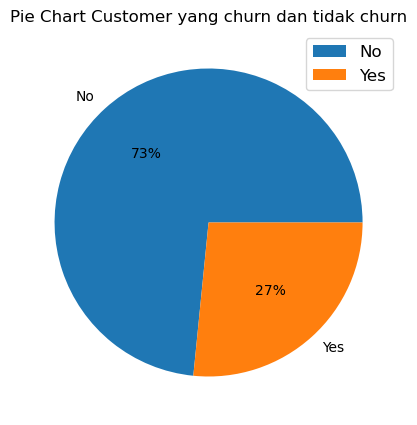

In [7]:
plt.figure(figsize=(7,5))


#sns.barplot(target["index"], target["percentage"])
plt.pie(target["percentage"], labels = target["index"], autopct='%.0f%%')
plt.title("Pie Chart Customer yang churn dan tidak churn")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

Dari plot diatas ditemukan bahwa dari keseluruhan jumlah customer yang churn adalah sebesar 27% (1869 customer),dan customer yang tidak churn / stay adalah 73% (5163 customer) 

## 4.2 EDA Kolom Numerikal

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               7032 non-null   object 
 1   senior_citizen       7032 non-null   object 
 2   partner              7032 non-null   object 
 3   dependents           7032 non-null   object 
 4   tenure               7032 non-null   int64  
 5   phone_service        7032 non-null   object 
 6   multiple_lines       7032 non-null   object 
 7   internet_service     7032 non-null   object 
 8   online_security      7032 non-null   object 
 9   online_backup        7032 non-null   object 
 10  device_protection    7032 non-null   object 
 11  tech_support         7032 non-null   object 
 12  streaming_tv         7032 non-null   object 
 13  streaming_movies     7032 non-null   object 
 14  contract             7032 non-null   object 
 15  paperless_billing    7032 non-null   o

### 4.2.1 EDA Numerikal Tenure dan Tenure Year

Berikut adalah meaning dari kolom tenure_year

|Value| Meaning|
|---|---|
|1| 0 -12 Bulan|
|2| 13-24 Bulan|
|3| 24-36 Bulan|
|4| 37-48 Bulan|
|5| 49-60 bulan|
|6| 60-72 Bulan|

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


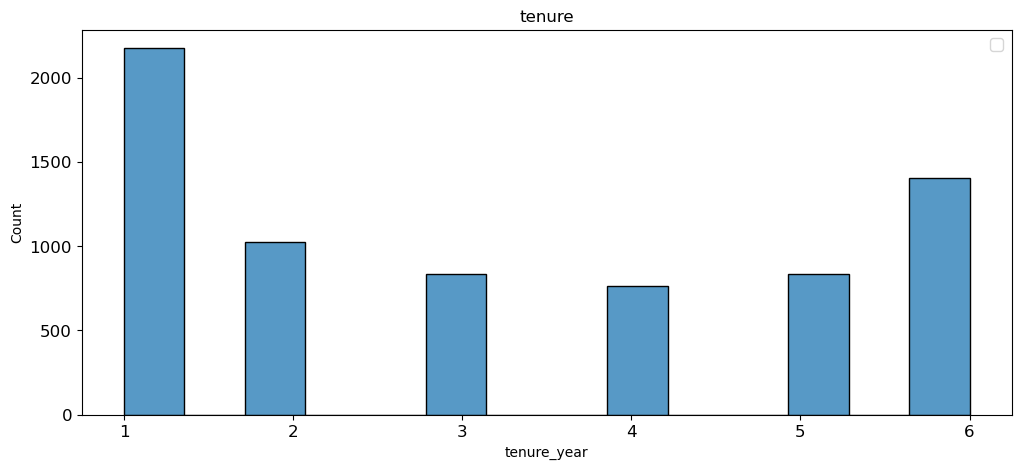

In [9]:
plt.figure(figsize=(12,5))


sns.histplot(df["tenure_year"])
plt.title("tenure")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

In [10]:
print("Nilai maksimum dari tenure adalah : ",df["tenure_year"].max())
print("Nilai minimum dari tenure adalah : ",df["tenure_year"].min())
print("Nilai rata-rata dari tenure adalah : ",df["tenure_year"].mean())
print("Nilai rata-rata dari tenure adalah : ",df["tenure_year"].value_counts())

Nilai maksimum dari tenure adalah :  6
Nilai minimum dari tenure adalah :  1
Nilai rata-rata dari tenure adalah :  3.181029579067122
Nilai rata-rata dari tenure adalah :  1    2175
6    1407
2    1024
3     832
5     832
4     762
Name: tenure_year, dtype: int64


Customer yang paling banyak adalah customer pada kelompok ke 1, dan yang paling sedikit adalah customer pada kelompok 4.

Text(0.5, 1.0, 'Tenure vs Customer Churn')

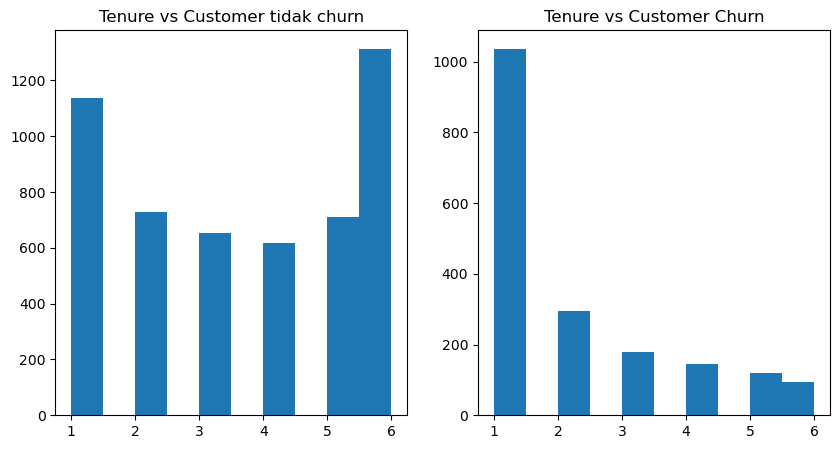

In [11]:
no_churn = df[df["churn"] == 'No']["tenure_year"].reset_index()
churns = df[df["churn"] == 'Yes']["tenure_year"].reset_index()

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
axes[0].hist(no_churn["tenure_year"])
axes[0].set_title("Tenure vs Customer tidak churn")
axes[1].hist(churns["tenure_year"])
axes[1].set_title("Tenure vs Customer Churn")

In [12]:
print("tenure terbanyak vs customer tidak churn adalah : ",no_churn["tenure_year"].value_counts())
print("")

print("Tenure terbanyak vs customer churn adalah : ",churns["tenure_year"].value_counts())

tenure terbanyak vs customer tidak churn adalah :  6    1314
1    1138
2     730
5     712
3     652
4     617
Name: tenure_year, dtype: int64

Tenure terbanyak vs customer churn adalah :  1    1037
2     294
3     180
4     145
5     120
6      93
Name: tenure_year, dtype: int64


Dari plot di atas diketahui bahwa customer yang paling banyak churn adalah pada customer pada kelompok 1 (0-12 bulan), dan customer yang tidak churn terbanyak pada kelompok 6 (61-72bulan).

### 4.2.2 EDA Numerikal Monthly_Charges

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


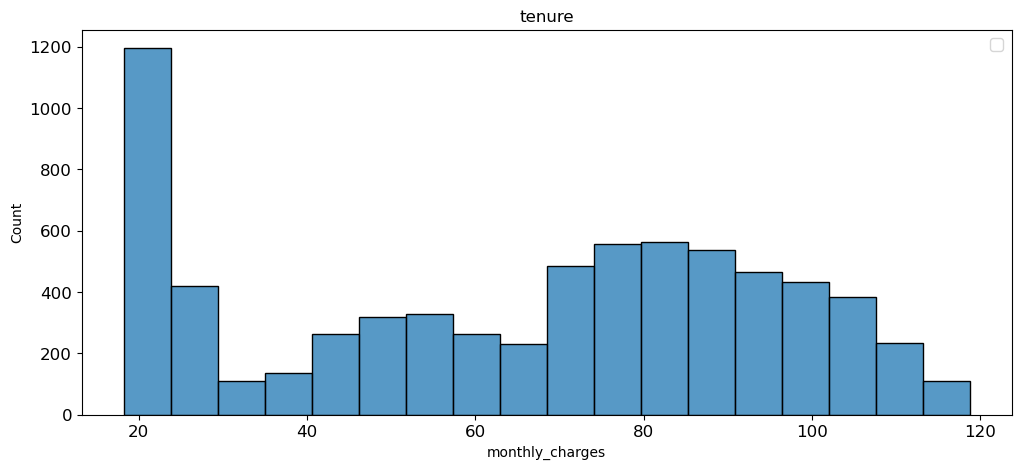

In [13]:
plt.figure(figsize=(12,5))


sns.histplot(df["monthly_charges"])
plt.title("tenure")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

In [14]:
print("Nilai maksimum dari monthly_charges adalah : ",df["monthly_charges"].max())
print("Nilai minimum dari monthly_charges adalah : ",df["monthly_charges"].min())
print("Nilai rata-rata dari monthly_charges adalah : ",df["monthly_charges"].mean())

Nilai maksimum dari monthly_charges adalah :  118.75
Nilai minimum dari monthly_charges adalah :  18.25
Nilai rata-rata dari monthly_charges adalah :  64.79820819112628


Text(0.5, 1.0, 'Monthly charges vs Churn')

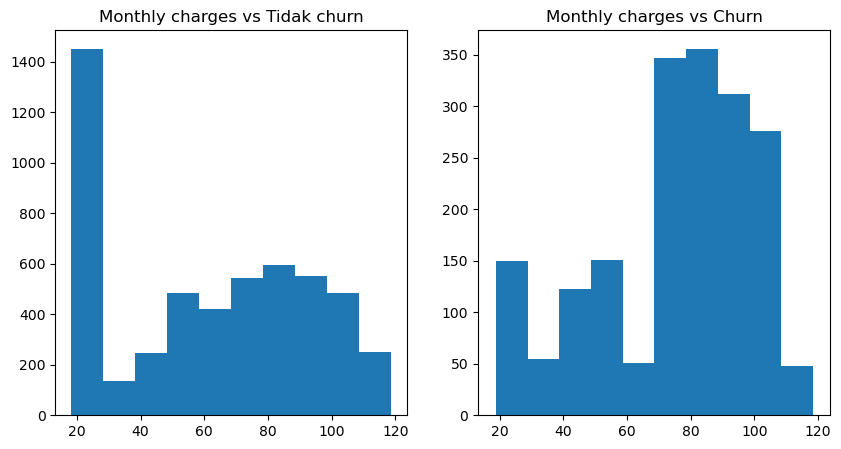

In [15]:
month_nochurn = df[df["churn"] == 'No']["monthly_charges"].reset_index()
month_churn = df[df["churn"] == 'Yes']["monthly_charges"].reset_index()

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
axes[0].hist(month_nochurn["monthly_charges"])
axes[0].set_title("Monthly charges vs Tidak churn")
axes[1].hist(month_churn["monthly_charges"])
axes[1].set_title("Monthly charges vs Churn")

In [16]:
print("Nilai rata-rata dari monthly_charges vs customer tidak churn adalah : ",month_nochurn["monthly_charges"].mean())
print("monthly_charges vs customer tidak churn adalah : ",month_nochurn["monthly_charges"].value_counts())
print("")
print("Nilai rata-rata dari monthly_charges vs customer churn adalah : ",month_churn["monthly_charges"].mean())
print("monthly_charges vs customer churn adalah : ",month_churn["monthly_charges"].value_counts())

Nilai rata-rata dari monthly_charges vs customer tidak churn adalah :  61.307408483439865
monthly_charges vs customer tidak churn adalah :  20.05     58
19.95     41
19.90     40
19.70     40
19.85     39
          ..
113.00     1
68.35      1
107.65     1
84.55      1
78.70      1
Name: monthly_charges, Length: 1459, dtype: int64

Nilai rata-rata dari monthly_charges vs customer churn adalah :  74.44133226324237
monthly_charges vs customer churn adalah :  74.40    13
74.90     9
74.95     8
45.30     8
70.15     7
         ..
29.50     1
24.60     1
68.25     1
87.45     1
44.20     1
Name: monthly_charges, Length: 910, dtype: int64


Dalam grafik di atas diketahui bahwa customer yang churn adalah customer yang membayar tagihan bulanan sebesar $74.40

### 4.2.3 EDA Numerikal Total_Charges

Text(0.5, 1.0, 'Total charges vs Churn')

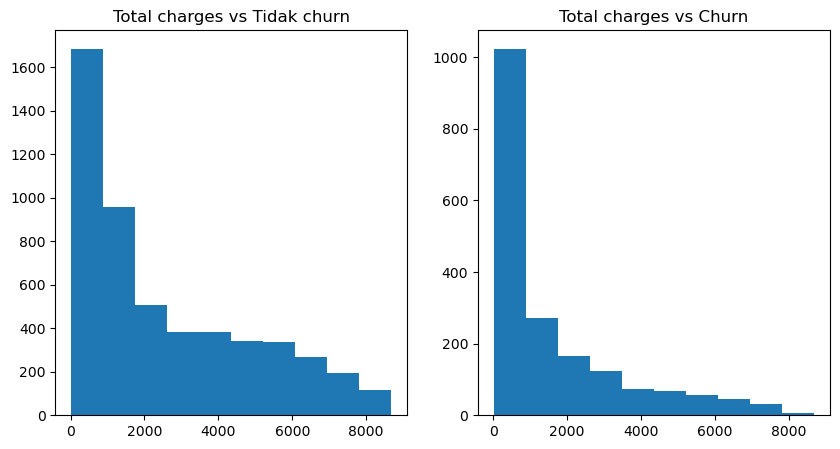

In [17]:
total_nochurn = df[df["churn"] == 'No']["total_charges"].reset_index()
total_churn = df[df["churn"] == 'Yes']["total_charges"].reset_index()

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
axes[0].hist(total_nochurn["total_charges"])
axes[0].set_title("Total charges vs Tidak churn")
axes[1].hist(total_churn["total_charges"])
axes[1].set_title("Total charges vs Churn")

In [18]:
print("Nilai rata-rata dari total_charges vs customer tidak churn adalah : ",total_nochurn["total_charges"].mean())
print("total_charges vs customer tidak churn adalah : ",total_nochurn["total_charges"].value_counts())
print("")
print("Nilai rata-rata dari total_charges vs customer churn adalah : ",total_churn["total_charges"].mean())
print("total_charges vs customer churn adalah : ",total_churn["total_charges"].value_counts())

Nilai rata-rata dari total_charges vs customer tidak churn adalah :  2555.344141003293
total_charges vs customer tidak churn adalah :  19.75      7
19.65      6
19.55      6
20.05      6
20.45      5
          ..
2117.20    1
203.95     1
6849.40    1
85.50      1
6844.50    1
Name: total_charges, Length: 4965, dtype: int64

Nilai rata-rata dari total_charges vs customer churn adalah :  1531.7960941680042
total_charges vs customer churn adalah :  20.20      6
45.30      5
69.65      4
20.15      4
19.90      4
          ..
1445.30    1
141.45     1
512.45     1
777.30     1
306.60     1
Name: total_charges, Length: 1732, dtype: int64


Dari data di atas diketahui bahwa mayoritas orang yang churn adalah customer yang total chargesnya tergolong kecil itu dikarenakan tenure customer yang churn adalah pada kelompok 1

## 4.3 EDA Kolom Kategorial

### 4.3.1 EDA Kolom Gender

In [19]:
target = df["gender"].value_counts().reset_index()
persen = df["gender"].value_counts(normalize=True).reset_index()
target["percentage"] = persen["gender"]
target

,index,gender,percentage
0,Male,3549,0.504693
1,Female,3483,0.495307


Text(0.5, 1.0, 'Gender Distributionn')

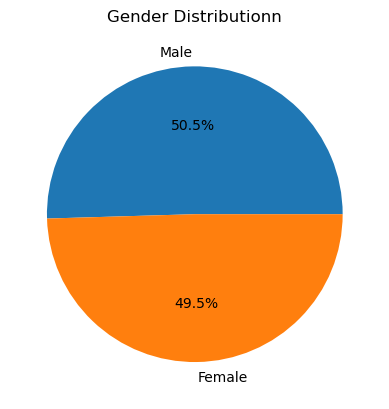

In [31]:
plt.pie(x = df['gender'].value_counts(), labels = df['gender'].value_counts().index, autopct = '%1.1f%%' , startangle = 360)
plt.title("Gender Distributionn")

Diketahui pada dataset ini gender di dominasi tipis oleh Male (50,5%), dan sisanya Female (49,5%)

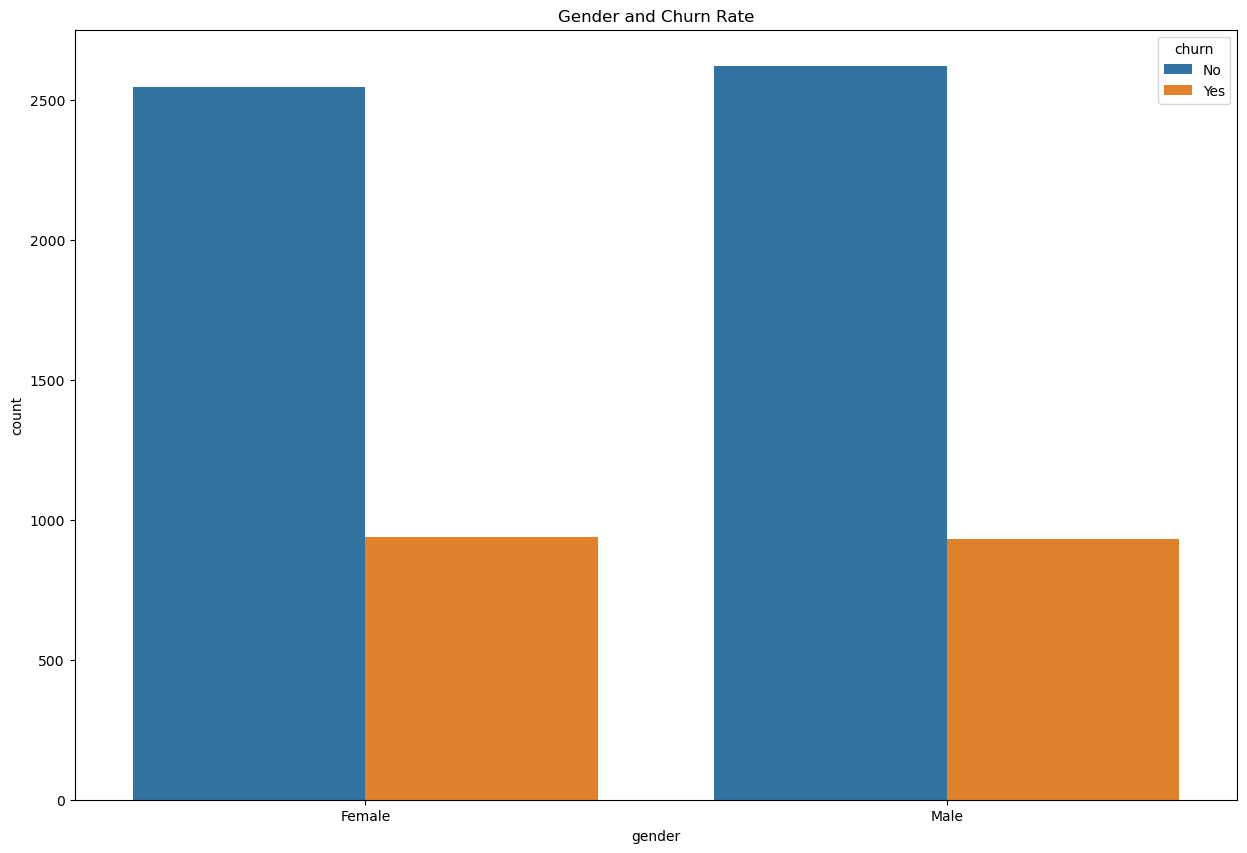

In [22]:
plt.figure(figsize = (15, 10))
sns.countplot(data = df, x = 'gender', hue = 'churn')
plt.title('Gender and Churn Rate')
plt.show()

In [23]:
# Menghitung value count untuk setiap kombinasi 'senior citizen' dan 'churn'
value_counts = df.groupby(['gender', 'churn']).size().reset_index(name='Count')

# Menampilkan hasil value count
print(value_counts)


   gender churn  Count
0  Female    No   2544
1  Female   Yes    939
2    Male    No   2619
3    Male   Yes    930


Dari dataset di atas diketahui bahwa gender female yang churn adalah 939 customer dan male 930 customer

### 4.3.2 EDA Kolom Senior Citizen

Text(0.5, 1.0, 'Senior Citizen Distribution')

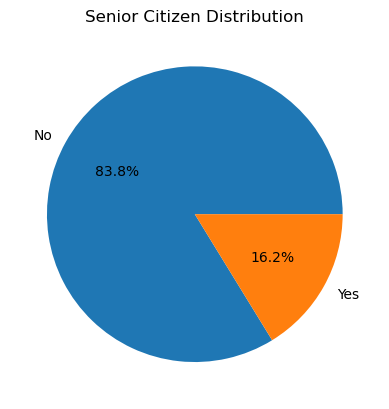

In [30]:
plt.pie(x = df['senior_citizen'].value_counts(), labels = df['senior_citizen'].value_counts().index, autopct = '%1.1f%%' , startangle = 360)
plt.title("Senior Citizen Distribution")

In [32]:
target = df["senior_citizen"].value_counts().reset_index()
persen = df["senior_citizen"].value_counts(normalize=True).reset_index()
target["percentage"] = persen["senior_citizen"]
target

,index,senior_citizen,percentage
0,No,5890,0.8376
1,Yes,1142,0.1624


Dari plot di atas diketahui bahwa terdapat 1142 customer yang termasuk senior citizen pada dataset ini

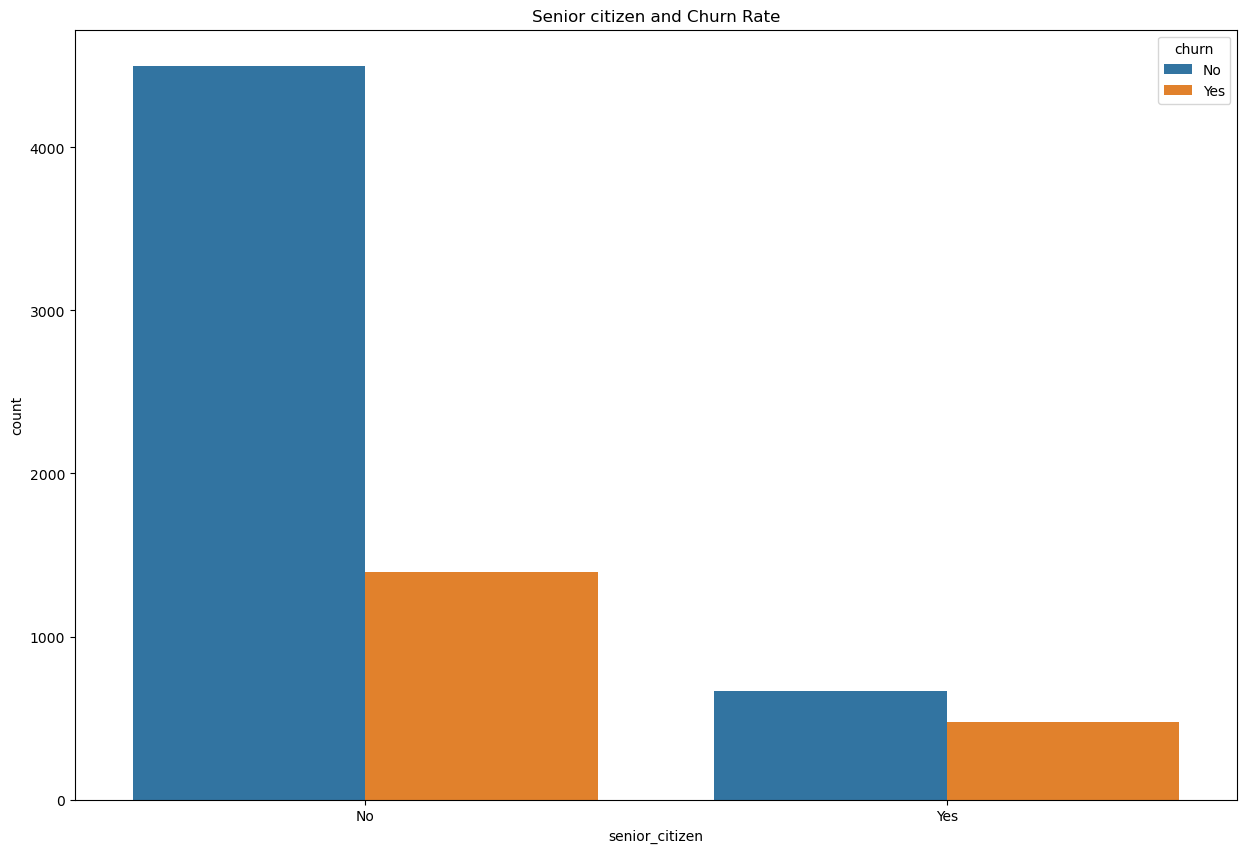

In [34]:
plt.figure(figsize = (15, 10))
sns.countplot(data = df, x = 'senior_citizen', hue = 'churn')
plt.title('Senior citizen and Churn Rate')
plt.show()

In [35]:
# Menghitung value count untuk setiap kombinasi 'senior citizen' dan 'churn'
value_counts = df.groupby(['senior_citizen', 'churn']).size().reset_index(name='Count')

# Menampilkan hasil value count
print(value_counts)


  senior_citizen churn  Count
0             No    No   4497
1             No   Yes   1393
2            Yes    No    666
3            Yes   Yes    476


Dari perbandingan plot di atas diketahui bahwa senior citizen yang churn sebesar 476 customer, dan yang bukan senior citizen sebesar 1393 customer